### Table of Contents

1. [#Gradient-Thresholding](#Gradient-Thresholding)
2. [#Color-Thresholding](#Color-Thresholding)
3. [#Color-and-Gradient-Thresholding](#Color-and-Gradient-Thresholding)

# Gradient Thresholding

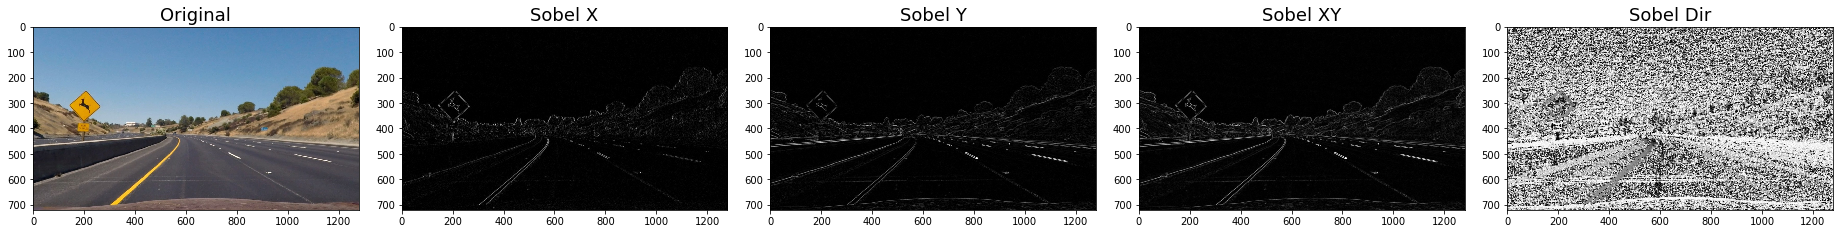

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

image = mpimg.imread('output_images/test2_undist.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# sobel x
abs_sobel_x = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
scaled_sobel_x = np.uint8(255*abs_sobel_x/np.max(abs_sobel_x))

# sobel y
abs_sobel_y = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
scaled_sobel_y = np.uint8(255*abs_sobel_y/np.max(abs_sobel_y))

# sobel mag
sobel_kernel = 3
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
gradmag = np.sqrt(sobelx**2 + sobely**2)
scale_factor = np.max(gradmag)/255 
gradmag = (gradmag/scale_factor).astype(np.uint8) 

# sobel grad dir
sobel_kernel = 15
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
absgraddir = absgraddir/np.pi/2*255

# Plot the result
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 4))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original', fontsize=18)
ax2.imshow(scaled_sobel_x, cmap='gray')
ax2.set_title('Sobel X', fontsize=18)
ax3.imshow(scaled_sobel_y, cmap='gray')
ax3.set_title('Sobel Y', fontsize=18)
ax4.imshow(gradmag, cmap='gray')
ax4.set_title('Sobel XY', fontsize=18)
ax5.imshow(absgraddir, cmap='gray')
ax5.set_title('Sobel Dir', fontsize=18)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### (a) sobel_x, sobel_y

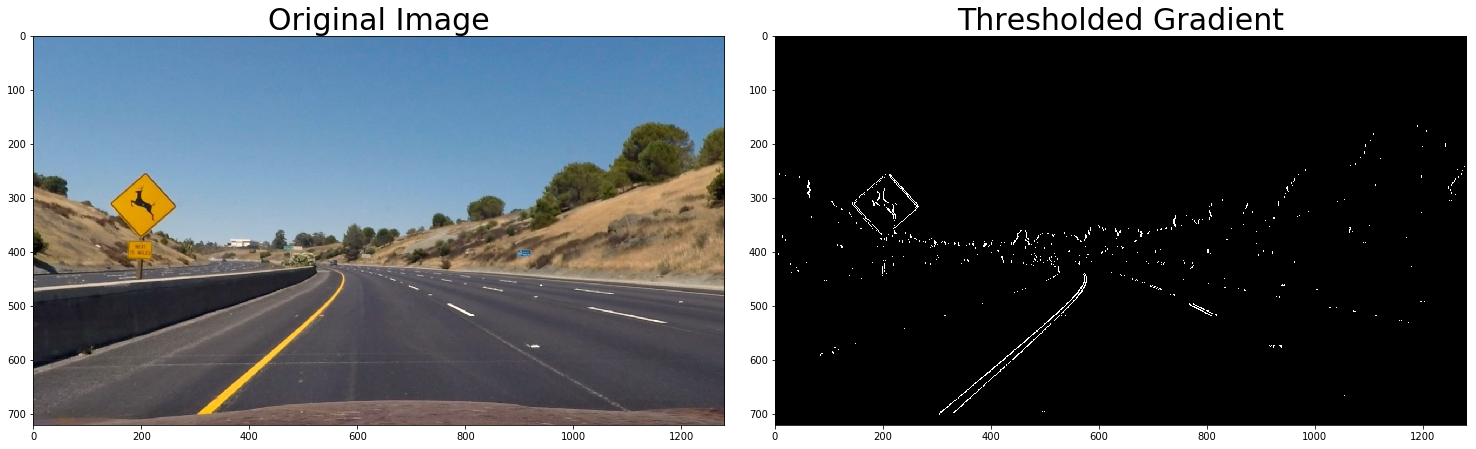

In [52]:
"""
lecture 21. Applying Sobels
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

image = mpimg.imread('output_images/test2_undist.jpg')

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

def abs_sobel_thresh_hls(img, orient='x', thresh_min=0, thresh_max=255):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]

    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(s_channel, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(s_channel, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=70, thresh_max=255)
#grad_binary = abs_sobel_thresh_hls(image, orient='x', thresh_min=30, thresh_max=255)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### (b) sobel_mag

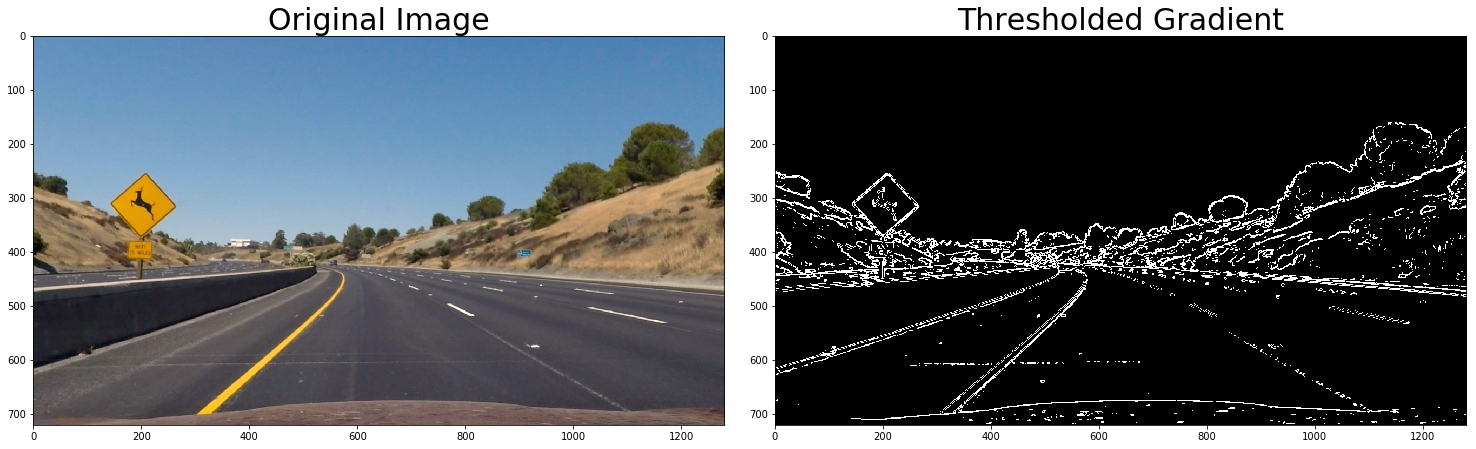

In [11]:
"""
lecture 22. Magnitude of the Gradient
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


image = mpimg.imread('output_images/test2_undist.jpg')

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### (c) sobel_dir

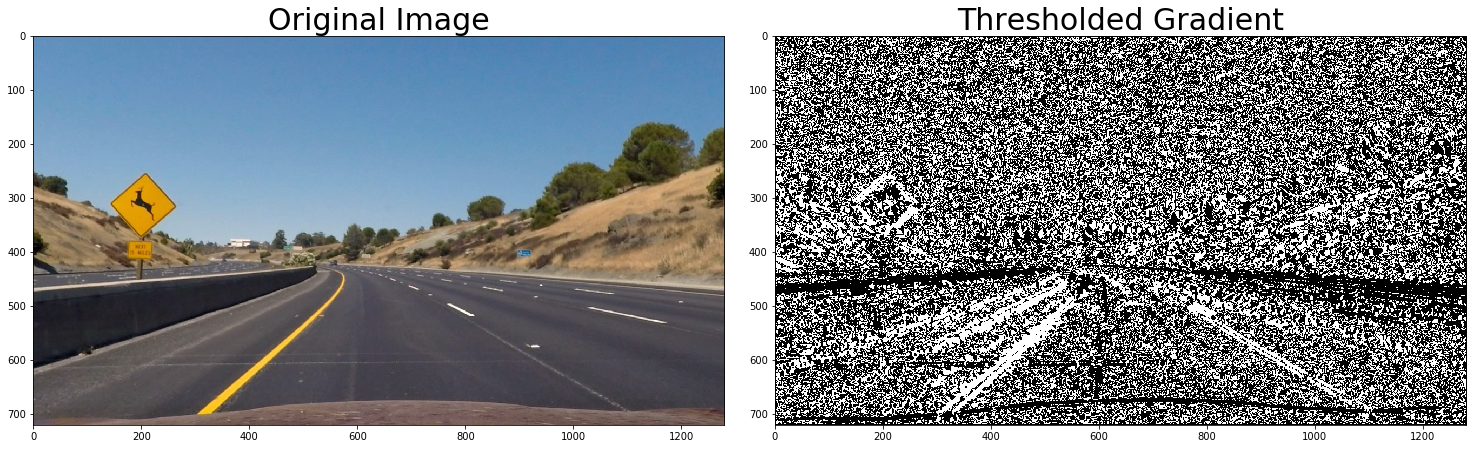

In [12]:
"""
lecture 23. Direction of the Gradient
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


image = mpimg.imread('output_images/test2_undist.jpg')

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Color Thresholding

### (a) RGB

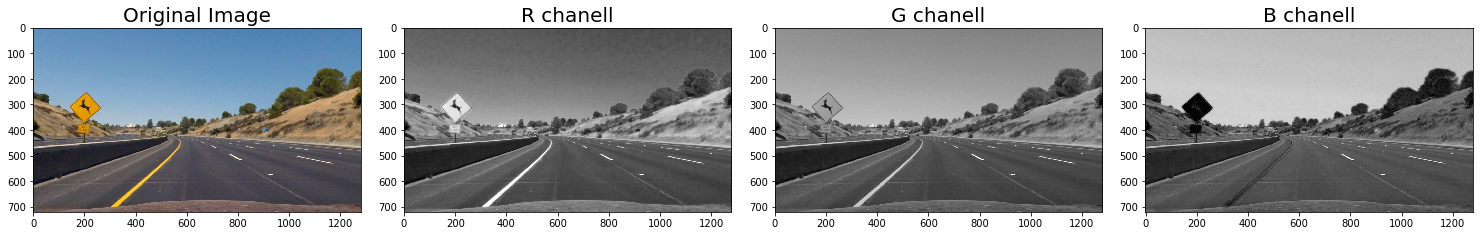

In [13]:
image = mpimg.imread('output_images/test2_undist.jpg')
r_channel = image[:,:,0]
g_channel = image[:,:,1]
b_channel = image[:,:,2]
 
# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(r_channel, cmap='gray')
ax2.set_title('R chanell', fontsize=20)
ax3.imshow(g_channel, cmap='gray')
ax3.set_title('G chanell', fontsize=20)
ax4.imshow(b_channel, cmap='gray')
ax4.set_title('B chanell', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### (b) HSV

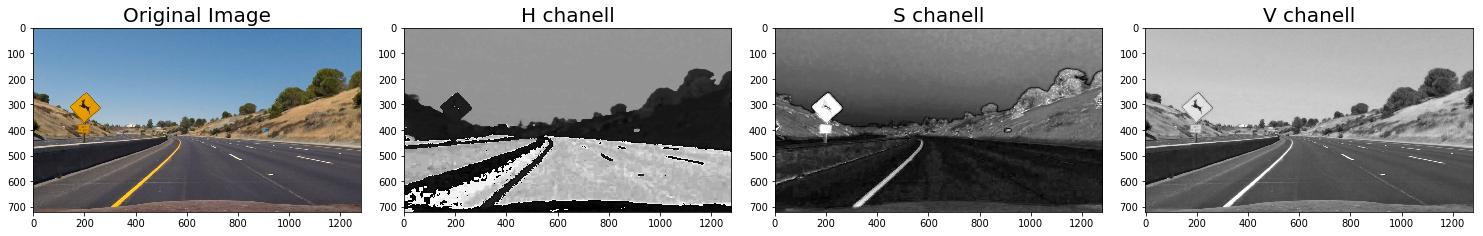

In [14]:
image = mpimg.imread('output_images/test2_undist.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h_channel = hsv[:,:,0]
s_channel = hsv[:,:,1]
v_channel = hsv[:,:,2]
 
# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(h_channel, cmap='gray')
ax2.set_title('H chanell', fontsize=20)
ax3.imshow(s_channel, cmap='gray')
ax3.set_title('S chanell', fontsize=20)
ax4.imshow(v_channel, cmap='gray')
ax4.set_title('V chanell', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### (c) HLS

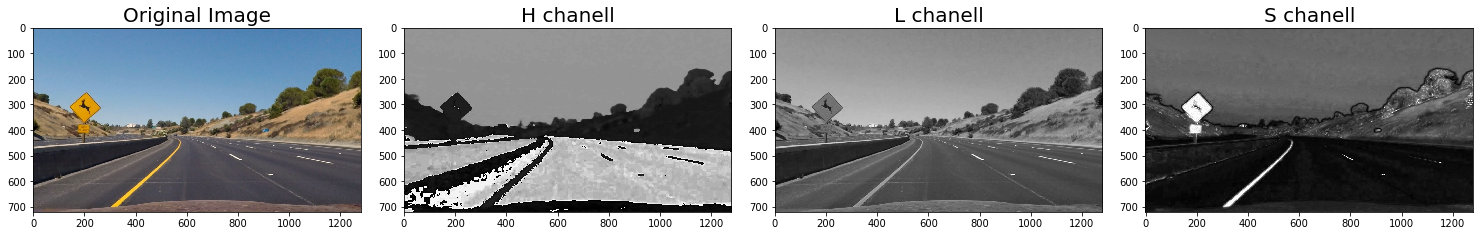

In [15]:
image = mpimg.imread('output_images/test2_undist.jpg')
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
 
# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(h_channel, cmap='gray')
ax2.set_title('H chanell', fontsize=20)
ax3.imshow(l_channel, cmap='gray')
ax3.set_title('L chanell', fontsize=20)
ax4.imshow(s_channel, cmap='gray')
ax4.set_title('S chanell', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### I choosed to use S channel

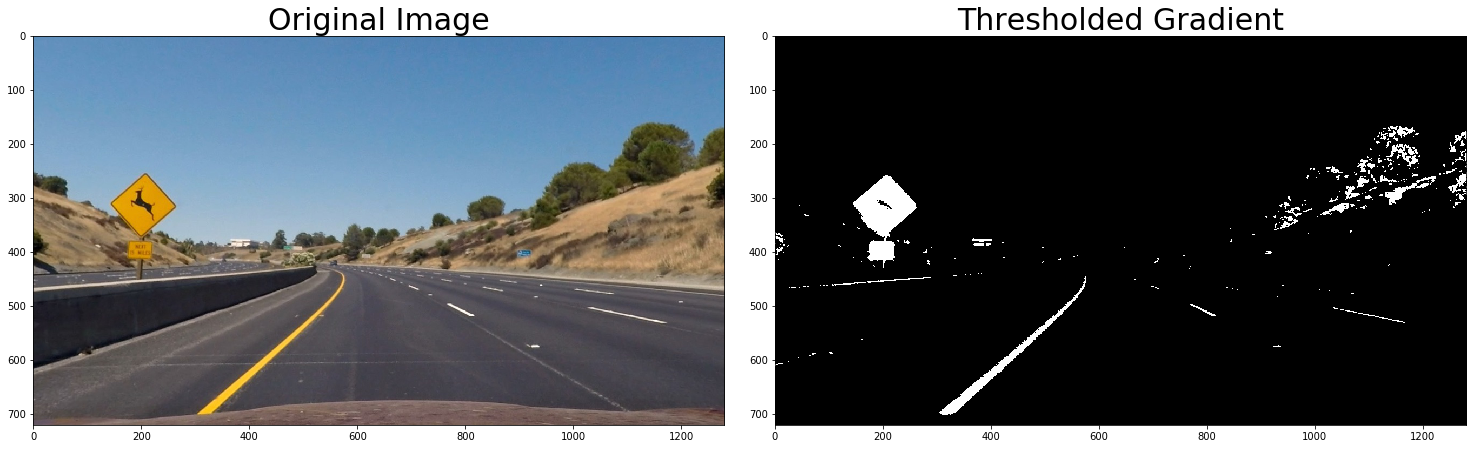

In [35]:
"""
lecture 29. HLS Quiz
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('output_images/test2_undist.jpg')

s_thresh=(120, 255)
l_thresh=(200, 255)

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
binary_output = np.zeros_like(s_channel)
binary_output[(l_channel > l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
binary_output[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
hls_binary = binary_output

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Color and Gradient Thresholding

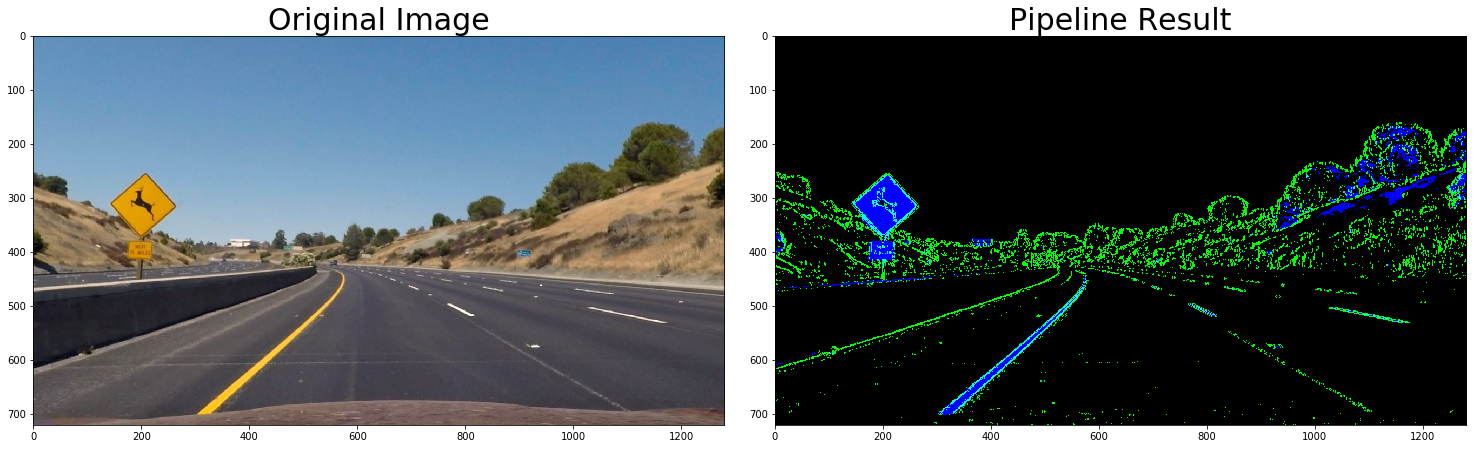

In [57]:
"""
lecture 30. Color and Gradient
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('output_images/test2_undist.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), l_thresh=(200, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    s_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary

s_thresh=(120, 255)
l_thresh=(200, 255)
sx_thresh=(20,100)

result = pipeline(image, s_thresh, l_thresh, sx_thresh)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

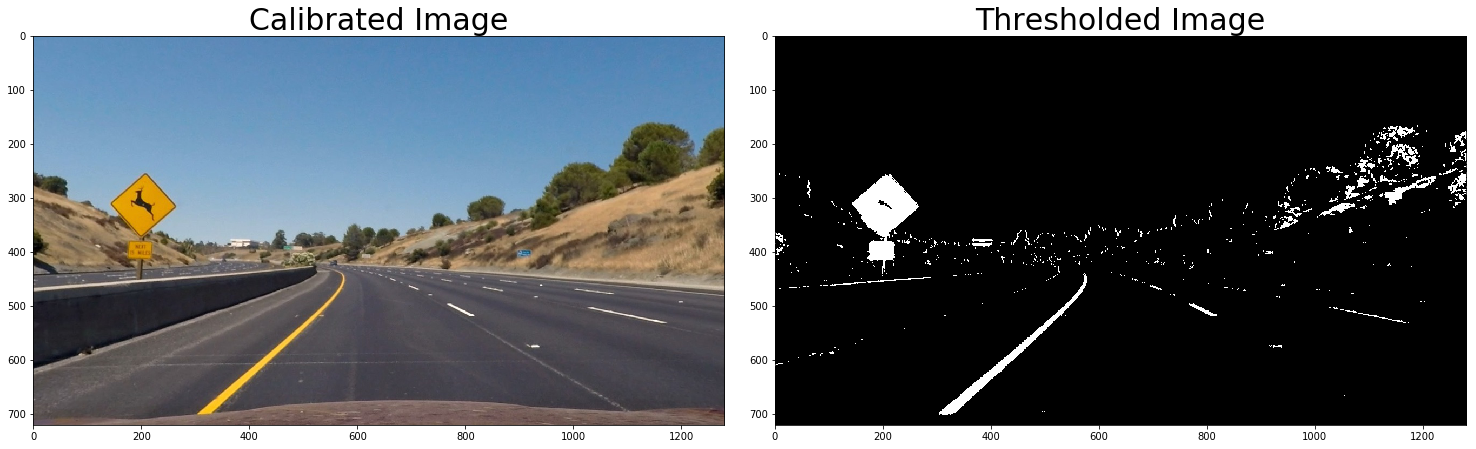

In [54]:
combined_binary = np.zeros_like(result[:,:,0])
combined_binary[(result[:,:,1] == 1) | (result[:,:,2] == 1)] = 1
cv2.imwrite('output_images/test2_threshold.jpg', combined_binary)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Calibrated Image', fontsize=30)

ax2.imshow(combined_binary, cmap='gray')
ax2.set_title('Thresholded Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/test2_threshold_for_submission.jpg');